In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [3]:
df2=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df2.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [5]:
df2.shape

(3999, 12)

In [6]:
data=df2.drop(['ID#'],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
data.shape

(3999, 11)

# Heirarchical

In [9]:
# Normalize heterogenous numerical data 
data_norm=pd.DataFrame(normalize(data),columns=data.columns)
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


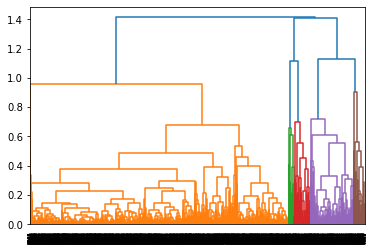

In [10]:
dendograms=sch.dendrogram(sch.linkage(data_norm,'complete'))

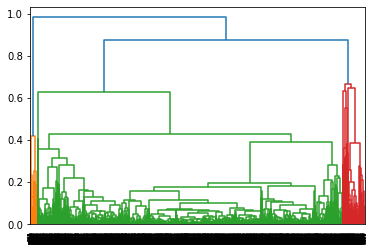

In [11]:
dendograms=sch.dendrogram(sch.linkage(data_norm,'average'))

In [14]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [16]:
y=pd.DataFrame(hclusters.fit_predict(df2),columns=['clustersid'])
y['clustersid'].value_counts()

3    2122
1    1488
2     290
4      73
0      26
Name: clustersid, dtype: int64

In [17]:
# Adding clusters to dataset
df2['clustersid']=hclusters.labels_
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [18]:
df2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,869.769231,841016.769231,512.692308,3.346154,1.000000,1.115385,52888.269231,22.346154,1797.807692,6.653846,6447.269231,0.846154
1,1,1811.166667,87824.594086,148.344758,2.881720,1.008737,1.030914,29035.436828,15.500000,622.870968,1.778898,4505.871640,0.470430
2,2,1513.500000,221027.768966,360.527586,2.737931,1.006897,1.000000,30897.858621,17.420690,1048.727586,3.037931,5062.600000,0.496552
3,3,2275.814797,22490.675778,96.467955,1.332705,1.018850,1.000000,5189.496701,7.648445,206.032045,0.662111,3622.059378,0.264373
4,4,978.616438,410397.397260,451.904110,3.273973,1.041096,1.000000,54930.465753,20.123288,1710.369863,5.301370,6076.561644,0.739726


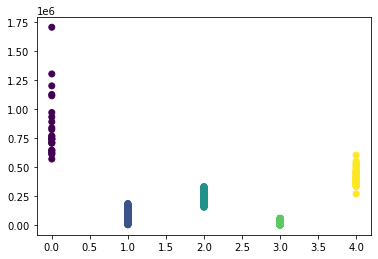

In [20]:
# Plot Clusters
plt.scatter(df2['clustersid'],df2['Balance'], c=hclusters.labels_) 

# KMean

In [21]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
# Normalize heterogenous numerical data by using Standard Scaler
df2_norm=StandardScaler().fit_transform(df2)

In [ ]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df2_norm)
    wcss.append(kmeans.inertia_)
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(df2_norm)
clusters4

In [ ]:
clusters4.labels_

In [ ]:
# Assign clusters to the data set
airline=df2.copy()
airline["clusters4id"]=clusters4.labels_
airline

In [ ]:
clusters4.cluster_centers_

In [ ]:
# Group data by Clusters (K=4)
airline.groupby("clusters4id").agg(["mean"]).reset_index()

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clusters4id'],airline['Balance'], c=clusters4.labels_) 

In [ ]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(df2_norm)
clusters5

In [ ]:
clusters5.labels_

In [ ]:
# Assign clusters to the data set
airline1=df2.copy()
airline1['clusters5id']=clusters5.labels_
airline1

In [ ]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

In [ ]:
# Group data by Clusters (K=5)
airline1.groupby('clusters5id').agg(['mean']).reset_index()

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline1['clusters5id'],airline1['Balance'], c=clusters5.labels_)

# DBSCAN

In [29]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
df3=StandardScaler().fit_transform(df2)
df3

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  8.31102704e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  8.31102704e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  8.31102704e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.20104631e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  8.31102704e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  8.31102704e-01]])

In [30]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df3)

DBSCAN(eps=1, min_samples=4)

In [31]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [32]:
# Adding clusters to dataset
df2['clusters']=dbscan.labels_
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3,0


In [33]:
df2.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1733.075075,172265.160661,810.072072,2.633634,1.06006,1.073574,36788.855856,21.033033,2013.339339,5.839339,4665.370871,0.659159,1.917417
1,0,2371.168142,22302.451327,0.680735,1.168142,1.00000,1.000000,3109.090538,6.094622,65.187202,0.257999,3444.331518,0.000000,3.000000
2,1,1637.291751,79964.682093,6.517103,3.376258,1.00000,1.000000,35101.581489,15.281690,250.124748,0.762575,4815.307847,1.000000,1.000000
3,2,1885.968481,91932.340974,3.383954,2.528653,1.00000,1.000000,19076.896848,12.378223,173.306590,0.497135,4363.159026,0.000000,1.000000
4,3,1992.428274,21895.120582,4.987526,1.829522,1.00000,1.000000,10189.494802,10.224532,178.723493,0.580042,4146.760915,1.000000,3.000000
5,4,1425.568421,213340.652632,0.000000,2.736842,1.00000,1.000000,23191.189474,13.168421,113.736842,0.410526,5261.957895,0.000000,2.000000
6,5,577.076923,199433.230769,0.000000,3.384615,1.00000,1.000000,29501.846154,16.384615,74.846154,0.307692,6726.076923,1.000000,2.000000
7,6,877.000000,236896.125000,0.000000,1.000000,1.00000,1.000000,8687.500000,2.875000,62.500000,0.125000,6110.250000,1.000000,2.000000
8,7,935.800000,275686.000000,0.000000,5.000000,1.00000,1.000000,63298.000000,16.400000,600.000000,1.400000,5942.200000,1.000000,2.000000
